# DSCI 100 - Group proposal
### Group 103 - Angelina Chu, Jenny Lee, Jessie Liang & Andreas Thrane

#### Title: Distinguish real pulsars using data classification
 

 
##### Introduction
Background information: Pulsars are a kind of Neutron star that arouse wide interests among astronomists. As pulsars rotate, they periodically emit radio beams that are detectable by sensitive apparatus. However, RFI and radio noise are also collected, which causes interference with detection. This project aims to help classify the observations to help find real pulsars from the spurious noise.
Question to answer: Are these 10 observations the real pulsars? (we will first randomly choose 10 observations, including both real pulsars and noise, from the original data set as our objects to predict. The reason why we do this is that we don’t want to make numbers by hand since the number we make may be very different from reality)
Dataset source: The dataset used is a given dataset by the DSCI 100 teaching team and is called “HTRU_2.csv”     (https://archive.ics.uci.edu/ml/datasets/HTRU2.)   
Dataset description:The dataset has 17,898 examples totally, with only 1,639 real Pulsar observations. There are neither column names nor multidata included. Each column respectively stands for:
1. Mean of the integrated profile. 
2. Standard deviation of the integrated profile. 
3. Excess kurtosis of the integrated profile. 
4. Skewness of the integrated profile. 
5. Mean of the DM-SNR curve. 
6. Standard deviation of the DM-SNR curve. 
7. Excess kurtosis of the DM-SNR curve. 
8. Skewness of the DM-SNR curve. 
9. Class 

##### Methods
Process of data analysis: <br>
(1) preprocess: read in -> tidy -> randomly choose 10 observations (including real and spurious ones) as objects to predict and remove them out from the dataset. <br>
(2) choose predictors: use forward selection to choose the predictors relevant to predictions. <br>
(3) classification: use cross-validation method and create models. <br>
(4) visualization of our result. <br>

Variables to use: <br> we will use forward selection in R to choose, by coding with loops<br>

Visualize the results:<br>
The result will be visualized using multiple kinds of plots. The forward selection method will determine the predictors that ensure the highest accuracy of the model. If there are more than two predictors, we will make several plots covering every combination of two predictors (eg: 3 plots for 3 predictors, 6 plots for 4 predictors and so on). The plot will display the standardized data, with pulsars and spurious observations distinguished by different colors. For an easy distinction, the ten randomly chosen observations will be colored black.

#### Expected outcomes and significance


What do you expect to find? <br>
The project is expected to find a highly accurate classification model that can predict the labels for pulsar candidates.

What impact could such findings have? <br>
The created classification model may help scientists rapidly distinguish real pulsars from numerous spurious observations. This technique may be applied in various research projects, including those that involve the understanding of stars and the mapping of the cosmos.

What future questions could this lead to?<br>
What are the methods to further improve the accuracy of the classifier?
 Are there methods for visualizing with more than two predictor variables in R?




# Preliminary exploratory data analysis

In [1]:
library(repr)
library(tidyverse)
library(tidymodels)
options(repr.matrix.max.rows = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

### Loading and adding column names to data

In [2]:
star_data <- read_csv("HTRU_2.csv", col_names = FALSE) %>%
    rename("Mean_profile" = X1,"SD_profile" = X2,"Kurtois_profile" = X3,"Skewness_profile" = X4,"Mean_curve" = X5,"SD_curve" = X6,"Kortuis_curve" = X7,"Skewness_curve" = X8,"Class" = X9) %>%
    mutate(Class = as_factor(Class))
star_data

Rows: 17898 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (9): X1, X2, X3, X4, X5, X6, X7, X8, X9

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Mean_profile,SD_profile,Kurtois_profile,Skewness_profile,Mean_curve,SD_curve,Kortuis_curve,Skewness_curve,Class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
140.5625,55.68378,-0.2345714,-0.6996484,3.199833,19.11043,7.975532,74.24222,0
102.5078,58.88243,0.4653182,-0.5150879,1.677258,14.86015,10.576487,127.39358,0
103.0156,39.34165,0.3233284,1.0511644,3.121237,21.74467,7.735822,63.17191,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
119.3359,59.93594,0.1593631,-0.74302540,21.430602,58.87200,2.499517,4.595173,0
114.5078,53.90240,0.2011614,-0.02478884,1.946488,13.38173,10.007967,134.238910,0
57.0625,85.79734,1.4063910,0.08951971,188.306020,64.71256,-1.597527,1.429475,0


### Splitting and summarizing the data

In [3]:
star_split <- initial_split(star_data, prop = 0.75, strata = Class)  
star_train <- training(star_split)   
star_test <- testing(star_split)

In [4]:
number_of_class <- star_train %>%
    group_by(Class) %>%
    count()

mean_of_predictors <- star_train %>%
    select(-Class) %>%
    map_dfr(mean)

number_of_NA <- sum(is.na(star_train))

number_of_class
mean_of_predictors
number_of_NA

Class,n
<fct>,<int>
0,12155
1,1268


Mean_profile,SD_profile,Kurtois_profile,Skewness_profile,Mean_curve,SD_curve,Kortuis_curve,Skewness_curve
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
110.8408,46.56502,0.4861971,1.800296,12.69273,26.36073,8.300088,104.9024


[1] 0

### Nummerical summary
As you can see above, the data set has been split into a training set containing 75% and a test set containing 25%. In the training set, there are 12182 class 0 and 1241 class 1. You are also able to see a table containing the mean of each of the predictors, and lastly you can see that there are no "NA" in our dataset.

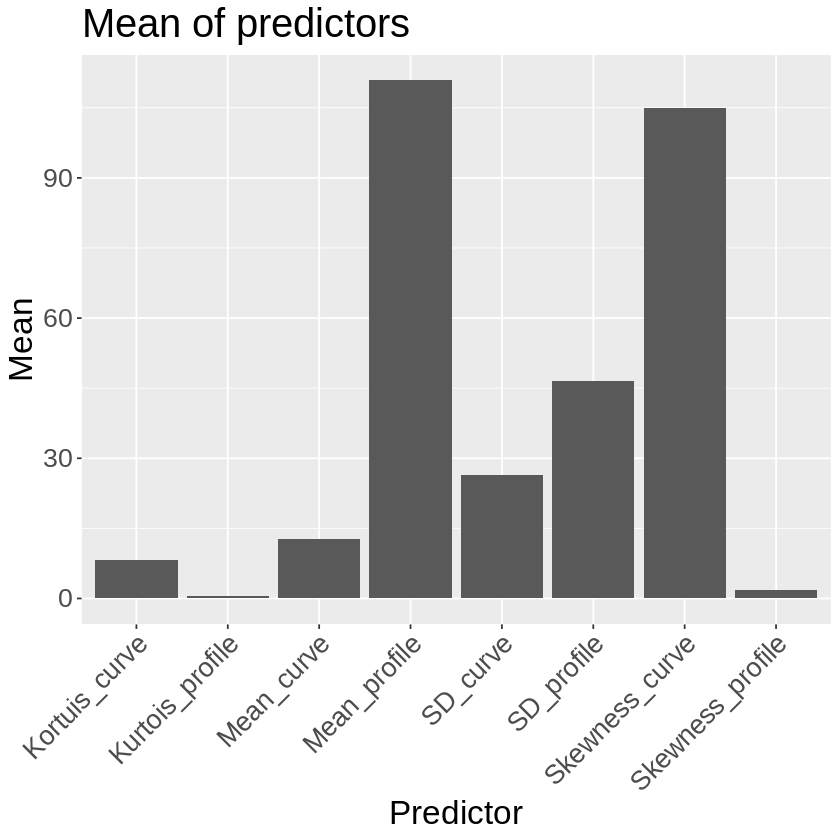

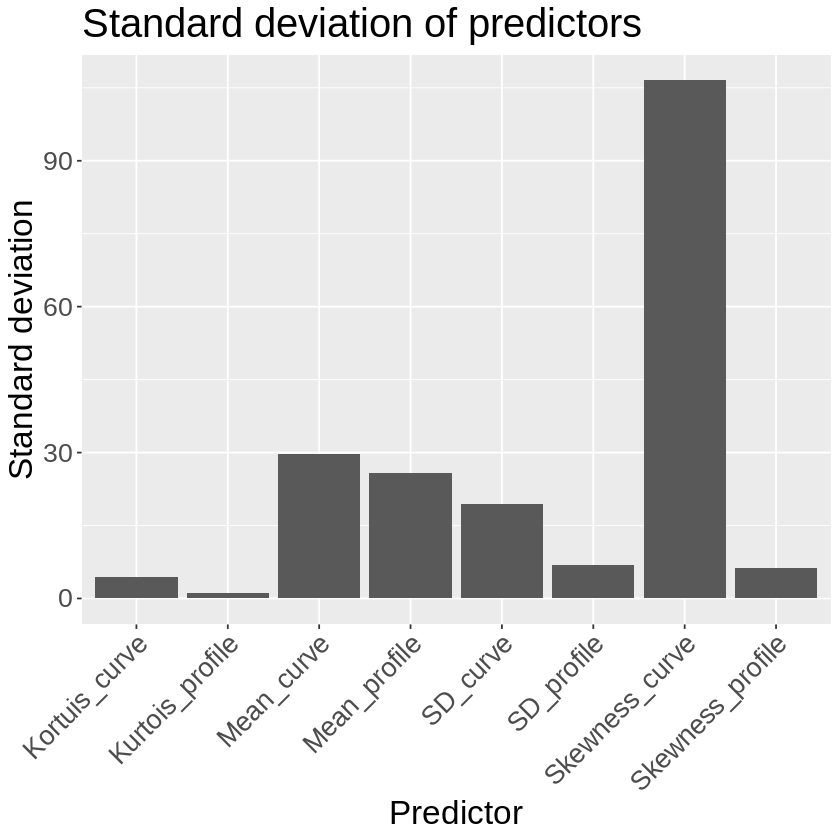

In [31]:
sd_of_predictors <- star_train %>%
    select(-Class) %>%
    map_dfr(sd)

pivot_long_mean <- mean_of_predictors %>%
    pivot_longer(cols = Mean_profile:Skewness_curve, names_to = "Variable", values_to = "mean")
pivot_long_sd <- sd_of_predictors %>%
    pivot_longer(cols = Mean_profile:Skewness_curve, names_to = "Variable", values_to = "sd")

explanatory_plot_mean <- ggplot(data = pivot_long_mean, aes(x = Variable, y = mean)) + geom_bar(stat='identity') +
    ylab("Mean") + xlab("Predictor") +
    ggtitle("Mean of predictors") +
    theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust=1)) + 
    theme(text = element_text(size = 20))

explanatory_plot_sd <- ggplot(data = pivot_long_sd, aes(x = Variable, y = sd)) + geom_bar(stat='identity') +
    ylab("Standard deviation") + xlab("Predictor") +
    ggtitle("Standard deviation of predictors") +
    theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust=1)) + 
    theme(text = element_text(size = 20))

explanatory_plot_mean
explanatory_plot_sd


### Visulization summary

On the plot above the mean and standard deviation of all the predictors are shown in two bar plots. These plots gives a quick overview of the nummerical size (by lookin at the mean) and the spread of the numbers for each predictor. It is clear that there is quite a large difference in the mean and standard deviation of the predictors, which goes to show that it is probably a good idea to centralise and standardise the data.